#### EXAMEN FINAL
Data Science and Machine Learning Applied to Financial Markets
##### Módulo V


El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio completo que maximice tu utilidad. Considera una tasa libre de riesgo de 5.0%, un premio
por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3.

Para las 7 acciones seleccionadas, calcula: 

1. Rendimiento esperado diario y anual bajo los siguientes modelos: 

a. Modelo de rendimiento promedio constante 

In [1]:
# Bibliotecas usadas en el notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn, seed, random
from scipy.optimize import minimize

In [42]:
#market.iloc[:,:]

In [45]:
# Cargamos la base de acciones y elegimos aleatoriamente 7 acciones de esta misma base
market = pd.read_excel("Prueba.xlsx", index_col=0)
market.columns = [c.replace(" MF Equity", "") for c in market.columns]
porfolio = market.iloc[:,:-1].sample(7, axis=1)
porfolio_mexind = pd.concat([ porfolio, market[['MEXBOL INDEX']] ], axis=1)
porfolio.head()

,GAPB,CEMEXCPO,ELEKTRA*,TLEVICPO,PE&OLES*,BIMBOA,GCARSOA1
DATE,,,,,,,
2016-01-01,152.05,8.72,379.04,94.34,177.22,45.95,70.98
2016-01-04,148.57,8.43,368.42,92.62,175.90,45.02,69.83
2016-01-05,147.93,8.31,357.30,91.89,176.45,45.77,70.70
2016-01-06,146.99,8.29,342.66,90.41,172.68,45.97,70.47
2016-01-07,141.32,7.64,334.15,90.23,172.94,46.18,68.15


In [46]:
# Para el modelo de rendimiento promedio constante 
# Hacemos el cambio a terminos porcentuales
rend = porfolio.pct_change().dropna()
r_diario = rend.mean()
print("Rendimiento medio esperado diario para cada activo: \n", r_diario)
r_s = rend.mean()*252
print("\n Rendimiento medio esperado anual para cada activo (considerando los 252 días hábiles del año): \n ",  r_s)
# Generación de ponderadores aleatorios
#seed(314)
w = random(size=7)
w = w / w.sum()
print(" \n los poderadores constantes son: ", w)
E_r = np.dot(w, r_diario)
print("El rendimiento esperado de un portafolio es un promedio ponderado \
de los rendimientos en cada uno de sus acciones. \n  CASO DIARIO, E_r :", E_r)
E_r = np.dot(w, r_s)
print("CASO ANUALIZADO, E_r :", E_r)

Rendimiento medio esperado diario para cada activo: 
 GAPB        0.000507
CEMEXCPO    0.000020
ELEKTRA*    0.001455
TLEVICPO   -0.000547
PE&OLES*    0.000441
BIMBOA     -0.000132
GCARSOA1    0.000224
dtype: float64

 Rendimiento medio esperado anual para cada activo (considerando los 252 días hábiles del año): 
  GAPB        0.127830
CEMEXCPO    0.005054
ELEKTRA*    0.366774
TLEVICPO   -0.137916
PE&OLES*    0.111053
BIMBOA     -0.033289
GCARSOA1    0.056460
dtype: float64
 
 los poderadores constantes son:  [0.32882943 0.18372846 0.04787931 0.02525513 0.16238325 0.08946459
 0.16245982]
El rendimiento esperado de un portafolio es un promedio ponderado de los rendimientos en cada uno de sus acciones. 
  CASO DIARIO, E_r : 0.0003224923525936205
CASO ANUALIZADO, E_r : 0.08126807285359236


b. Modelo CAPM

i. ¿Cuál es la beta de cada acción?

ii. Clasifica las acciones en defensivas y agresiva

In [47]:
# Calculamos las betas del portafolio
rets = porfolio_mexind.pct_change().dropna()
Phi = rets.iloc[:, :-1].values
t = rets.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

P = np.ones((N, M))
P = np.c_[P, Phi]

In [48]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rets.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [49]:
B.sort_values("beta", ascending=False)

param,alpha,beta
security,,
GAPB,-0.000072,0.282531
BIMBOA,0.000108,0.273451
CEMEXCPO,0.000066,0.251091
GCARSOA1,0.000024,0.212667
TLEVICPO,0.000180,0.198514
PE&OLES*,0.000013,0.132759
ELEKTRA*,-0.000019,0.062163


Podemos notar que con respecto al MEXBOL, las acciones son defensivas debido a que su beta es menor a 1 para todas las acciones

2. Matriz varianza-covarianza

In [50]:
rend.cov()

,GAPB,CEMEXCPO,ELEKTRA*,TLEVICPO,PE&OLES*,BIMBOA,GCARSOA1
GAPB,0.000233,0.000070,0.000017,0.000044,0.000059,0.000052,0.000068
CEMEXCPO,0.000070,0.000411,0.000021,0.000109,0.000101,0.000079,0.000101
ELEKTRA*,0.000017,0.000021,0.000428,0.000019,0.000022,0.000035,0.000053
TLEVICPO,0.000044,0.000109,0.000019,0.000313,0.000053,0.000057,0.000048
PE&OLES*,0.000059,0.000101,0.000022,0.000053,0.000548,0.000088,0.000101
BIMBOA,0.000052,0.000079,0.000035,0.000057,0.000088,0.000237,0.000097
GCARSOA1,0.000068,0.000101,0.000053,0.000048,0.000101,0.000097,0.000361


Utilizando los rendimientos esperados bajo el modelo CAPM, construye:

3. Frontera de carteras de mínima varianza y frontera eficiente / graficar

4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

5. Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo 

In [51]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [52]:
port_rend(w, rend), port_vol(w, rend)

(0.08126807285359236, 0.17519544768326026)

In [53]:
weights_sim = np.random.random((5000, 7))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)

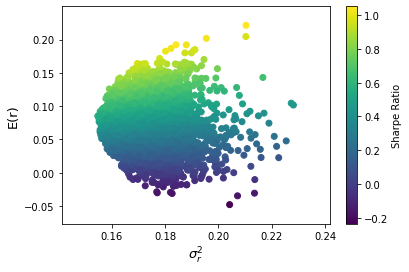

In [54]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [55]:
# Creamos la frontera eficiente
from scipy.optimize import minimize

N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.15398953960492356
     jac: array([0.15414654, 0.15375769, 0.15399159, 0.15399766, 0.15398075,
       0.15391804, 0.153799  ])
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.258938  , 0.05678247, 0.17012606, 0.17551168, 0.06396563,
       0.19861849, 0.07605768])

In [56]:
# En este caso el elemento que minimiza la varianza es wp0
wp0 = port0.x
port_rend(wp0, rend), port_vol(wp0, rend)

(0.07636485028137338, 0.15398953960492356)

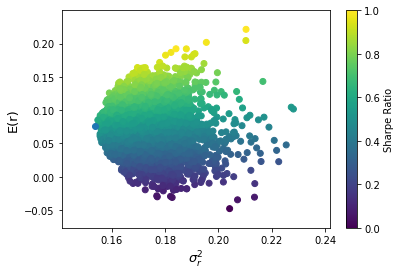

In [57]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp0, rend), port_rend(wp0, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [61]:
r_min = port_rend(wp0, rend)
r_max = r_s.max()

rend_max = np.linspace(r_min, r_max)

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

e0 = 0.1
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)}
]

In [62]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

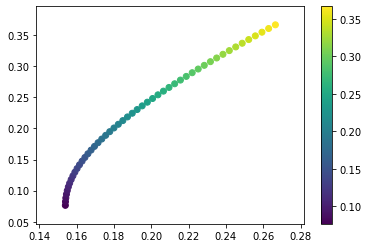

In [63]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

Maximizamos el coeficiente de Sharp usando una tasa libre de riesgo del 5%

In [64]:
rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - rf) / port_vol(weights, rend)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [65]:
w_sharpe = f_sharpe.x

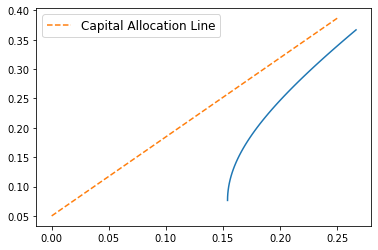

In [66]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

### Deep Learning:

6. ¿En qué escenarios ocuparías una red neuronal?

Cuando el tamaño del conjunto de datos con el que se está trabajando es muy grande o complejo como para poder ser tratado con un modelo de machine learning tradicional de manera eficiente. Usualmente también podríamos pensar en usar redes neuronales artificiales si contamos con la infraestructura adecuada y/o sí se está buscando una solución más adecuada o precisa para un problema de gran complejidad.

7. ¿En qué escenarios no ocuparías una red neuronal?

Cuando el conjunto de datos no es tan grande y se puede abordar facilmente con un problema de machine learning tradicional. También si el problema en cuestión no requiere de gran poder de computo para poder hallar los parámetros del modelo, o inclusive si se busca ahorrar recursos y aún así obtener sin tanto esfuerzo un buen resultado para entrenamiento no supervisado y/o supervisado.

8. Menciona tres funciones de activación para una red neuronal feed-forward

- Sigmoidal: Función con dominio en $ \mathbb{R} $ e imagen en $ [0, 1] $

- ReLU: Rectified Linear Unit

- Tanh: Tangente Hiperbólica

9. ¿Qué es el método de backpropagation?

Es un algoritmo usado en los modelos de redes neuronales artificiales que hace uso del cálculo de gradientes para lograr el "entrenamiento" de la red, o en otras palabras, para lograr encontrar los parámetros que mejor ajusta los pesos de la red neuronal. Consiste en alimentar la red con valores y una vez que llegan a la capa final los parámetros se ajustan "regresando" los valores desde la capa de salida hacia las capas anteriores.

10. ¿En qué difiere una red neuronal feed-forward de una red neuronal convolucional?

En que son en escencia dos tipos de redes neuronales que sirven para diferentes propositos. Mientras que la red feedforward es un tipo de red que solo se conecta con los nodos de la capa siguiente (y solo en esa dirección) además de que es un modelo ampliamente usado en términos generales, las redes convolucionales pueden también ser una red feedforward pero con la diferencia de que éstas manejan dentro de sus capas matrices de convolución y son usualmente utilizadas para poder clasificar o trabajar con imágenes.